# Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Data processing

In [2]:
data = pd.read_csv("../data/vgsales.csv")

# Exploratory Data Analysis

In [3]:
data.shape

(16291, 11)

In [4]:
data.describe()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
data.nunique()

Rank            16291
Name            11325
Platform           31
Year               39
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

In [8]:
data.dropna(inplace = True)
data.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
# Підрахунок відсутніх значень і їхній відсоток від загальної кількості
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

missing_info = pd.DataFrame({
    "Missing Values": missing_data,
    "Percentage": missing_percentage
})

# Фільтрація стовпців де є відсутні значення
missing_info[missing_info["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)

,Missing Values,Percentage


In [10]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


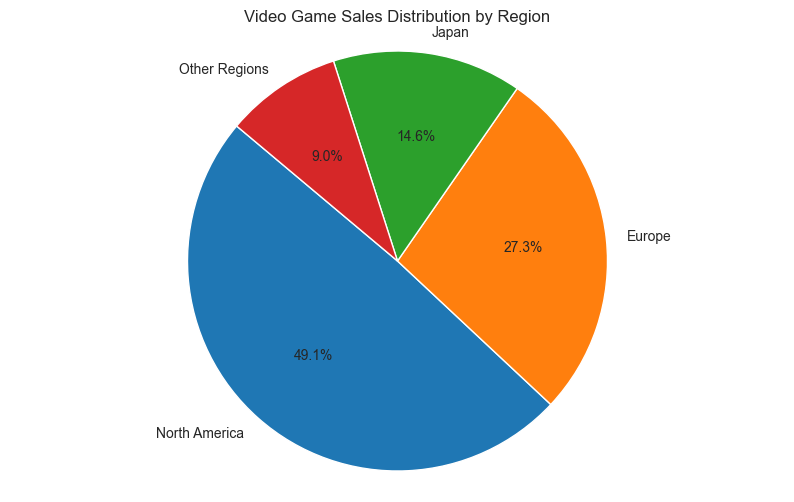

In [12]:
region_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Перейменування колонок для зручності
region_sales.index = ['North America', 'Europe', 'Japan', 'Other Regions']

# Побудова кругової діаграми
plt.figure(figsize=(10, 6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Video Game Sales Distribution by Region')
plt.axis('equal')  # Забезпечує круглу форму діаграми

# Збереження діаграми в файл
# plt.savefig('/mnt/data/videogame_sales_distribution_by_region.png')

plt.show()

# Top 10 Video_games platform

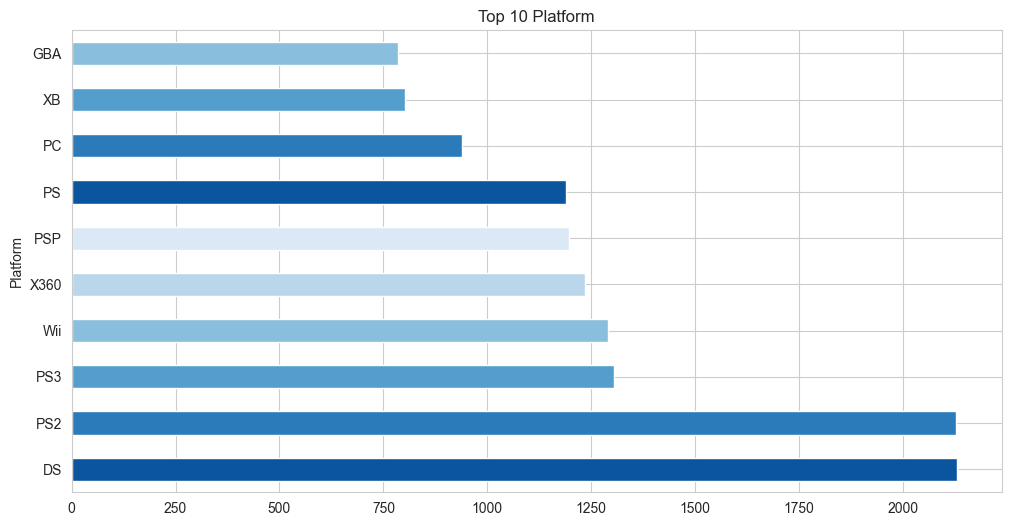

In [13]:
Platform_counts = data['Platform'].value_counts()
Platform_counts[:10].plot(kind = 'barh', color = sns.color_palette("Blues_r"), title = "Top 10 Platform", figsize = (12,6));

# DS & PS2 is the most 2 Platform making Video_Games

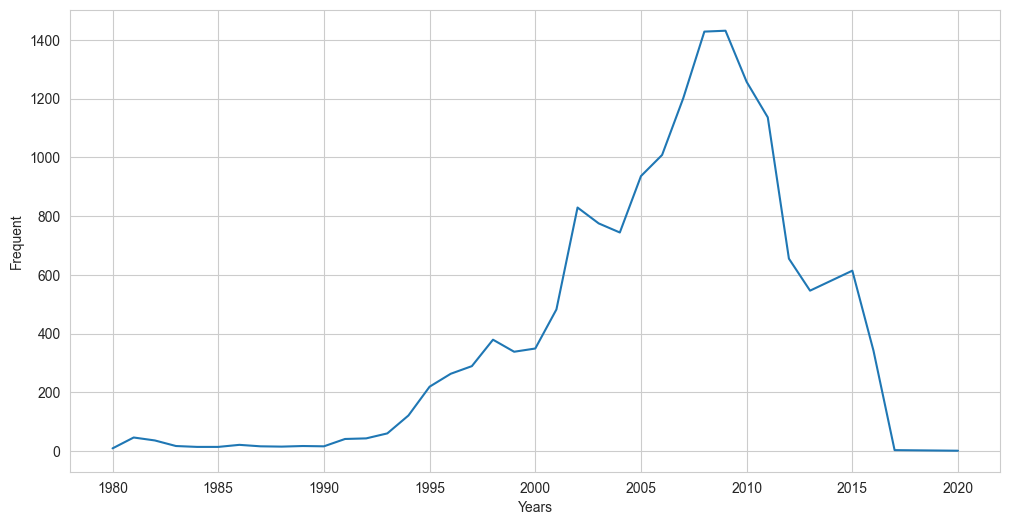

In [14]:
# Time Stamp for Games year

release_year = data['Year'].value_counts()
x_values = release_year.values
plt.figure(figsize=(12,6))
sns.lineplot(data = release_year)
plt.xlabel("Years")
plt.ylabel("Frequent");

# Year 2009 is the most year making Video_Games

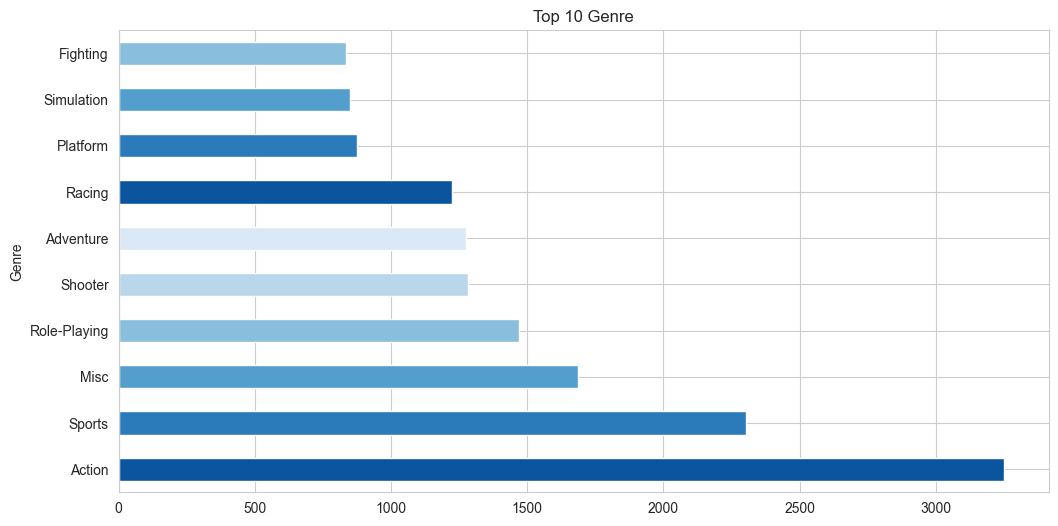

In [15]:
# Top 10 Genre 

Genre_counts = data['Genre'].value_counts()
Genre_counts[:10].plot(kind = 'barh', color = sns.color_palette("Blues_r"), title = "Top 10 Genre", figsize = (12,6));

# The Action Genre is the most genre in Video_games¶

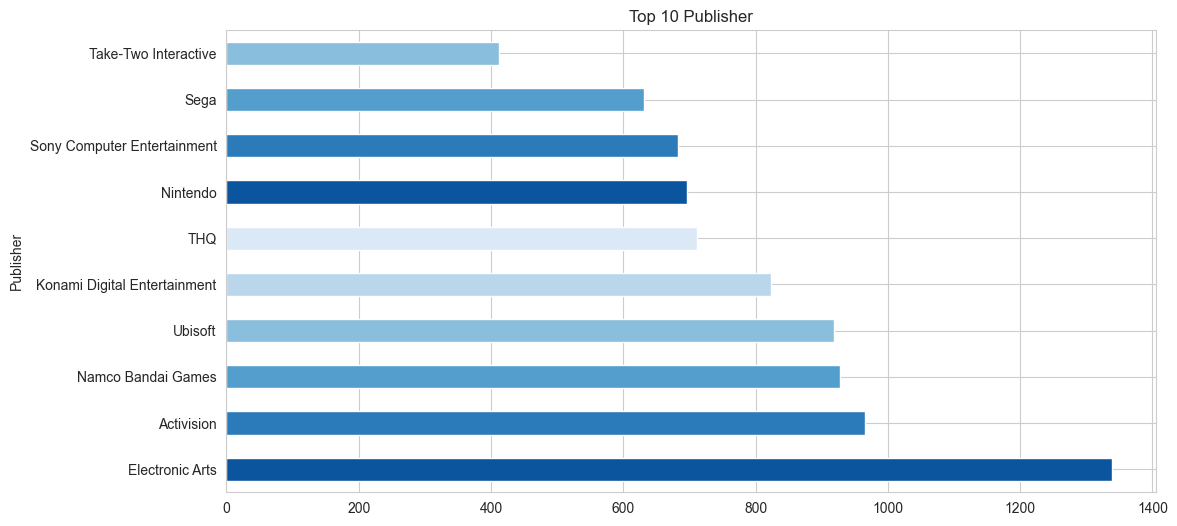

In [16]:
# Top 10 Publisher 

Publisher_counts = data['Publisher'].value_counts()
Publisher_counts[:10].plot(kind = 'barh', color = sns.color_palette("Blues_r"), title = "Top 10 Publisher", figsize = (12,6));

# What is the biggest platform making money?

<Figure size 1200x600 with 0 Axes>

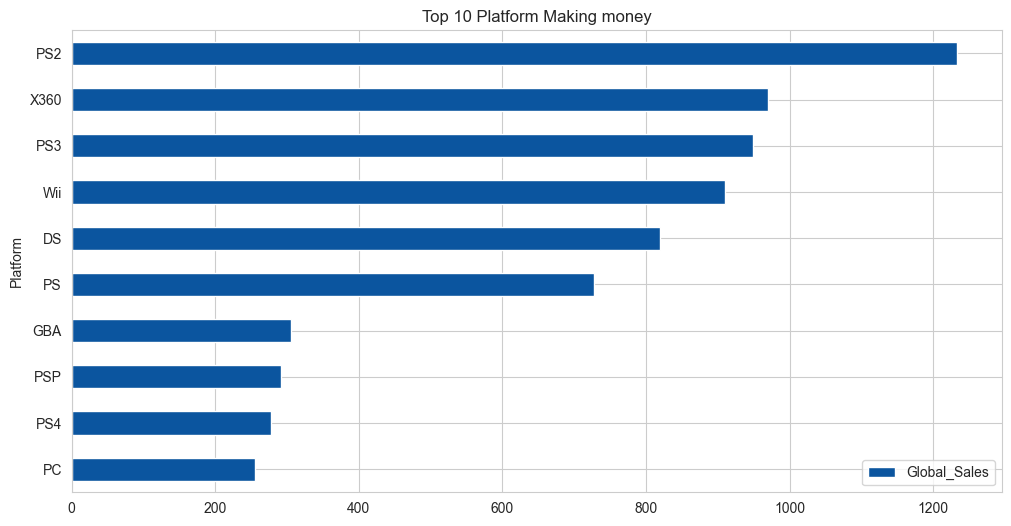

In [17]:
plt.figure(figsize = (12,6))
platform_Sales = data.groupby('Platform')["Global_Sales"].sum().to_frame().reset_index().sort_values(by = "Global_Sales")
platform_Sales.set_index('Platform', inplace=True)
platform_Sales.tail(10).plot(kind = 'barh', color = sns.color_palette("Blues_r"), title = "Top 10 Platform Making money", figsize = (12,6));

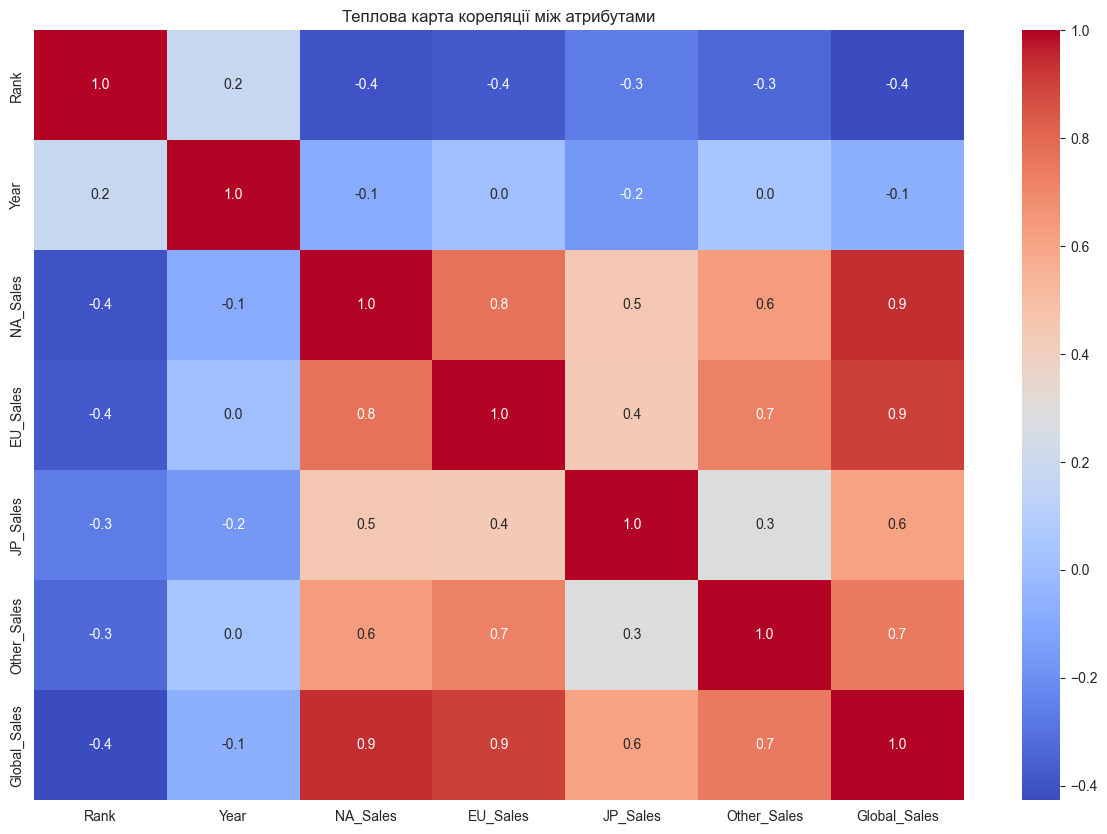

In [18]:
# 1. Теплова карта кореляції між різними атрибутами
numeric_ds = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_ds.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Теплова карта кореляції між атрибутами')
plt.show()